## Importing 

In [9]:
import pandas as pd
import os

#### Merging 12 months into 1 file

In [10]:
# df2 = pd.read_csv("Data Science Projects\Project 1\Sales_April_2019.csv")

# all_months_data = pd.DataFrame()

# files = [file for file in os.listdir('Data Science Projects\Project 1') ]

# for file in files:
#     df2 = pd.read_csv("Data Science Projects/Project 1/" + file)
#     all_months_data = pd.concat([all_months_data, df])
    
# all_months_data.to_csv("all_data.csv", index = False)

#### Read in updated dataframe

In [11]:
df = pd.read_csv("all_data.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"


### [1] Best Month for Sales, How much earned that month

#### Removing Null Cells

In [12]:
nan_df = df[df.isna().any(axis=1)]
nan_df.head()

df = df.dropna(how = 'all')

#### Removing and finding "Or" cells

In [16]:
df = df[df["Month"].str[0:2] != "Or"]

#### Converting data types of columns

In [17]:
df['Quantity Ordered'] = pd.to_numeric(df["Quantity Ordered"])
df['Price Each'] = pd.to_numeric(df["Price Each"])

#### Adding Month Column

In [18]:
df["Month"] = df["Order Date"].str[0:2]
df["Month"] = df["Month"].astype('int64')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Add Sales Column

In [19]:
df["Sales"] = df["Quantity Ordered"] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Summing all Sales by Month

In [29]:
results = df.groupby("Month").sum()
results.head()

C:\Users\yatik\AppData\Local\Temp\ipykernel_24244\3870269928.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = df.groupby("Month").sum()


,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75


#### Plotting Sales by Month

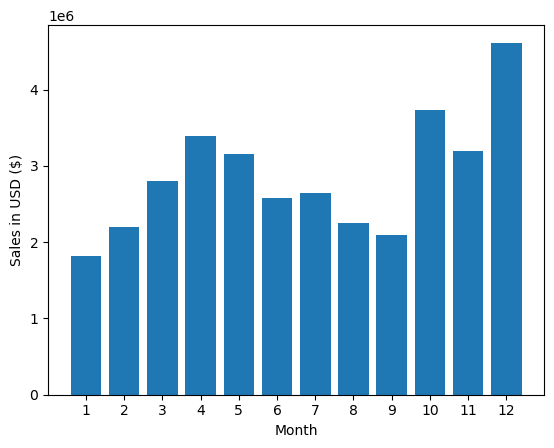

In [21]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel("Month")
plt.show()




## [2] Finding which city had the highest sales

#### Splitting Column Based on apply function using delimiter

In [65]:
# df[['Address', 'City', 'State']] = df["Purchase Address"].str.split(",", expand = True)
# df = df.drop(['State', 'Address'], axis=1)
df['City'] = df['Purchase Address'].apply(lambda x: f'{x.split(",")[1]} ({x.split(",")[2].split(" ")[1]})')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


#### Grouping sales by city

In [60]:
results2 = df.groupby("City").sum()
results2.head(15)

C:\Users\yatik\AppData\Local\Temp\ipykernel_24244\2475747153.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results2 = df.groupby("City").sum()


,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta GA,16602,2779908.20,104794,2795498.58
Austin TX,11153,1809873.61,69829,1819581.75
Boston MA,22528,3637409.77,141112,3661642.01
Dallas TX,16730,2752627.82,104620,2767975.40
Los Angeles CA,33289,5421435.23,208325,5452570.80
New York City NY,27932,4635370.83,175741,4664317.43
Portland ME,2750,447189.25,17144,449758.27
Portland OR,11303,1860558.22,70621,1870732.34
San Francisco CA,50239,8211461.74,315520,8262203.91


#### Plotting Results

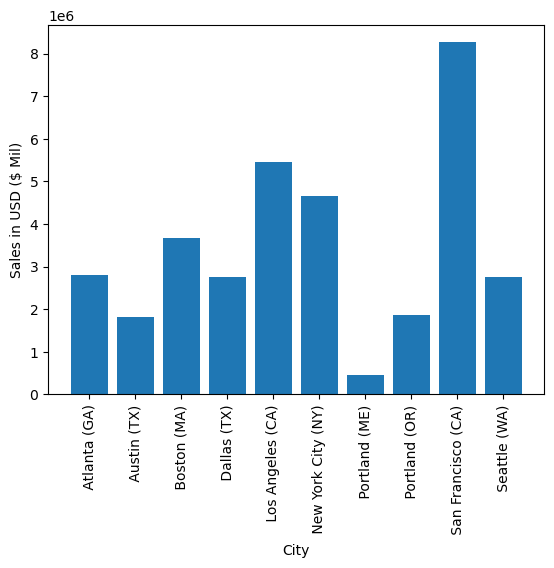

In [73]:
cities = [city for city, df in df.groupby('City')]

plt.bar(cities, results2['Sales'])
plt.xticks(cities, rotation = 'vertical', size = 10)
plt.ylabel('Sales in USD ($ Mil)')
plt.xlabel("City")
plt.show()

## [3] What time is best to issue ads?

In [96]:
# df['Time'] = df['Order Date'].apply(lambda x: x.split(' ')[1])
# df[['Hour', 'Min']] = df['Time'].str.split(':', expand = True)
# df = df.drop('Time', axis=1)
# df = df.drop(['Hour', 'Min'], axis = 1)

# df["Order Date"] = pd.to_datetime(df['Order Date'])

df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [118]:
results3 = df.groupby(["Hour"]).sum()
results3.head(20)

C:\Users\yatik\AppData\Local\Temp\ipykernel_24244\1442651507.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results3 = df.groupby(["Hour"]).sum()


,Quantity Ordered,Price Each,Month,Sales,Minute
Hour,,,,,
0,4428,709296.70,27554,713721.27,103596
1,2619,458490.00,16657,460866.88,61807
2,1398,233833.64,8507,234851.44,32508
3,928,144726.42,5904,145757.89,23044
4,937,162058.18,6148,162661.01,26876
5,1493,229621.21,9301,230679.82,42877
6,2810,445000.11,17539,448113.00,80343
7,4556,740568.11,28850,744854.12,127447
8,7002,1185970.62,43626,1192348.97,198135


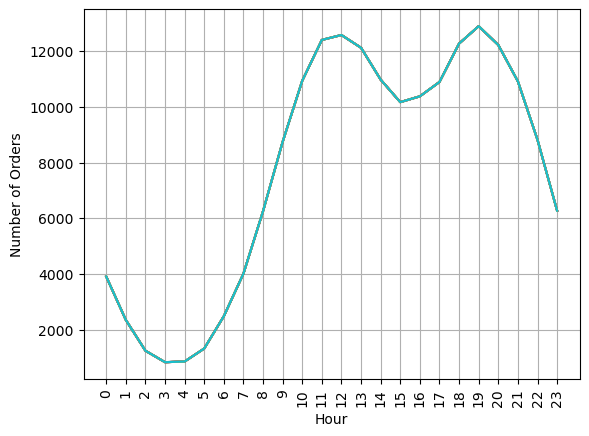

In [128]:
hours = [hour for hour, df in df.groupby('Hour')]

plt.plot(hours, df.groupby('Hour').count())
plt.xticks(hours, rotation = 'vertical')
plt.ylabel('Number of Orders')
plt.xlabel('Hour')
plt.grid()
plt.show()

## [4] Which products are bought together the most?

#### Creating a df that only consists of duplicate order IDs

In [145]:
df2 = df[df["Order ID"].duplicated(keep = False)]
df2["Grouped"] = df2.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df2.head()

C:\Users\yatik\AppData\Local\Temp\ipykernel_24244\2093432248.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Grouped"] = df2.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [148]:
df3 = df2[df2["Order ID"].duplicated(keep = 'last')]
df3.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco (CA),17,0,"AAA Batteries (4-pack),Google Phone"
119,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,14.95,New York City (NY),11,7,"Lightning Charging Cable,USB-C Charging Cable"


In [151]:
df3[["Order ID", 'Grouped']].head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


#### Using counter function to count occurances of combinations

In [162]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df3["Grouped"]:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1135
('Google Phone', 'USB-C Charging Cable') 1129
('iPhone', 'Wired Headphones') 540
('Google Phone', 'Wired Headphones') 535
('iPhone', 'Apple Airpods Headphones') 439
('Vareebadd Phone', 'USB-C Charging Cable') 412
('USB-C Charging Cable', 'Wired Headphones') 292
('Google Phone', 'Bose SoundSport Headphones') 283
('Vareebadd Phone', 'Wired Headphones') 184
('Lightning Charging Cable', 'Wired Headphones') 161


## [5] What Product Sold the Most

In [164]:
results4 = df.groupby("Product").sum()
results4.head(50)

C:\Users\yatik\AppData\Local\Temp\ipykernel_24244\2297789513.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results4 = df.groupby("Product").sum()


,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
Product,,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764,122252
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916,184331
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076,183480
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332,612113
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304,455570
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445,392603
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815,142789


Text(0.5, 0, 'Product')

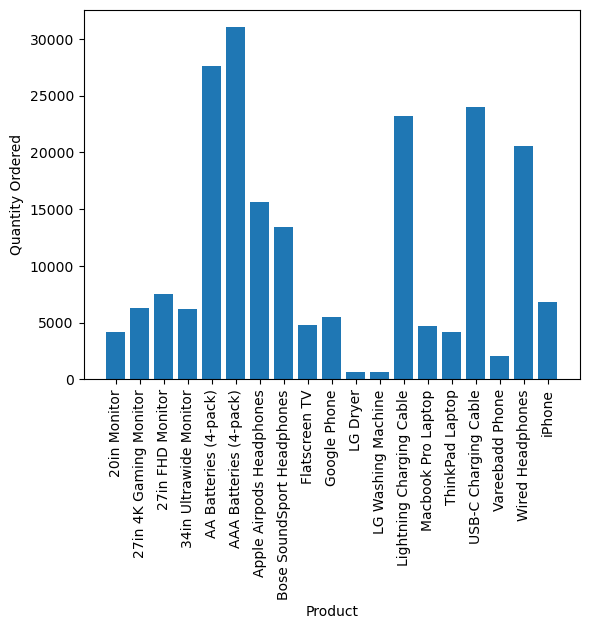

In [171]:
Prod = [prod for prod, df in df.groupby('Product') ]

plt.bar(Prod, results4["Quantity Ordered"])
plt.xticks(Prod, rotation = 'vertical')
plt.ylabel("Quantity Ordered")
plt.xlabel("Product")

## Overlaying Graphs with different y axis

C:\Users\yatik\AppData\Local\Temp\ipykernel_24244\2958551038.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = df.groupby('Product').mean()['Price Each']
C:\Users\yatik\AppData\Local\Temp\ipykernel_24244\2958551038.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(Prod, rotation = 'vertical', size =8)


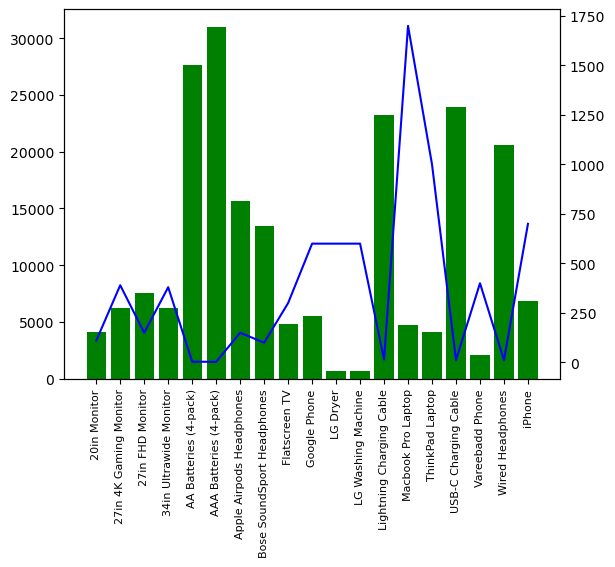

In [180]:
prices = df.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(Prod, results4["Quantity Ordered"], color = 'g')
ax2.plot(Prod, prices, color = 'b')
ax1.set_xticklabels(Prod, rotation = 'vertical', size =8)

plt.show()

